In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [3]:
data_path = "Tesla.csv"
tesla_data = pd.read_csv(data_path, index_col='Date', parse_dates=True)

In [4]:
tesla_data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


# **Part 1**

Clean the data (The price is a decimal number with 6 decimal place accuracy, make it an
integer with 0 decimal accuracy)

In [5]:
# Check the data types of attributes
print(tesla_data.dtypes)

Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


In [6]:
# Convert all attributes from decimals to integers
for col in tesla_data.columns:
    if tesla_data[col].dtype == 'float64':  # Check if the column has decimal values
        tesla_data[col] = (tesla_data[col] * 100).astype(int)  # Multiply by 100 and convert to int

tesla_data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,1900,2500,1754,2388,18766300,2388
2010-06-30,2579,3042,2329,2383,17187100,2383
2010-07-01,2500,2592,2027,2195,8218800,2195
2010-07-02,2300,2310,1870,1920,5139800,1920
2010-07-06,2000,2000,1583,1611,6866900,1611


In [7]:
# Check the data types of attributes again
print(tesla_data.dtypes)

Open         int64
High         int64
Low          int64
Close        int64
Volume       int64
Adj Close    int64
dtype: object


# **Part 2**

Make a bar plot showing the mean of max prices of stock of each year.

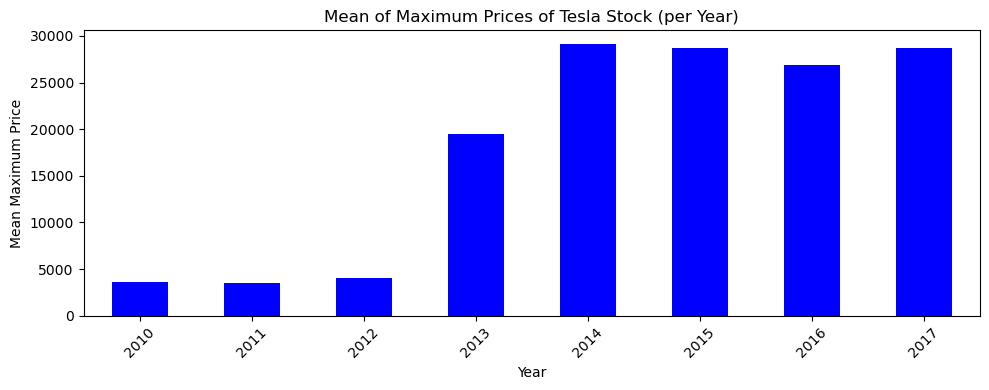

In [8]:
# Calculate the maximum prices for each year
max_prices_per_year = tesla_data['High'].resample('Y').max()

# Calculate the mean of the maximum prices for each year
mean_max_prices_per_year = max_prices_per_year.groupby(max_prices_per_year.index.year).mean()

# Create a bar plot
plt.figure(figsize=(10, 4))
mean_max_prices_per_year.plot(kind='bar', color='blue')
plt.title('Mean of Maximum Prices of Tesla Stock (per Year)')
plt.xlabel('Year')
plt.ylabel('Mean Maximum Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Part 3**

Make a pie chart showing the amount of stocks traded in each year.

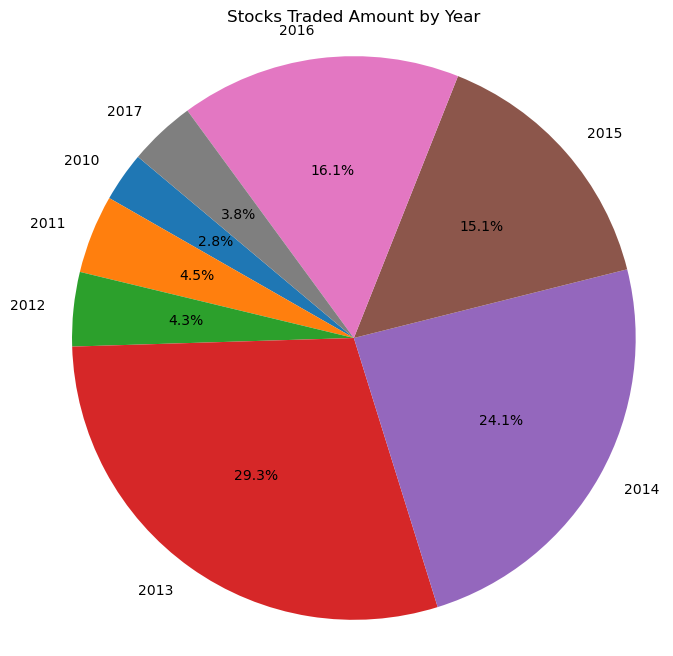

In [14]:
# Calculate the total volume of stocks traded for each year
total_volume_per_year = tesla_data['Volume'].resample('Y').sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_volume_per_year, labels=total_volume_per_year.index.year, autopct='%1.1f%%', startangle=140)
plt.title('Stocks Traded Amount by Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **Part 4**

7 Bar graphs for each year having the amount of stocks traded for each month

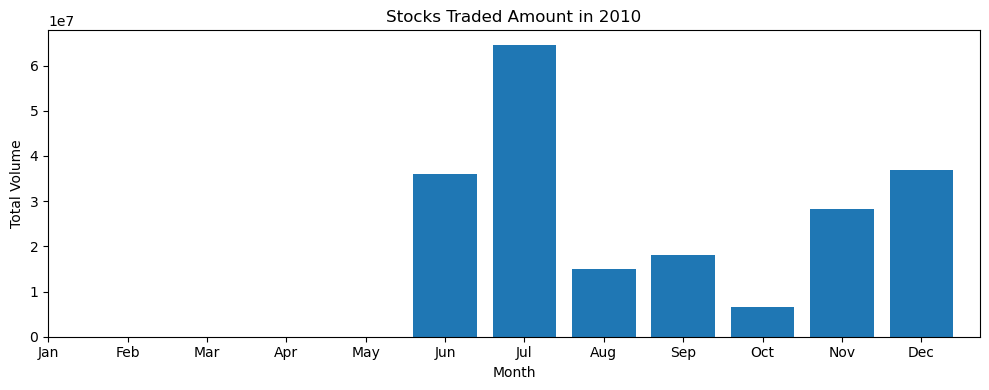

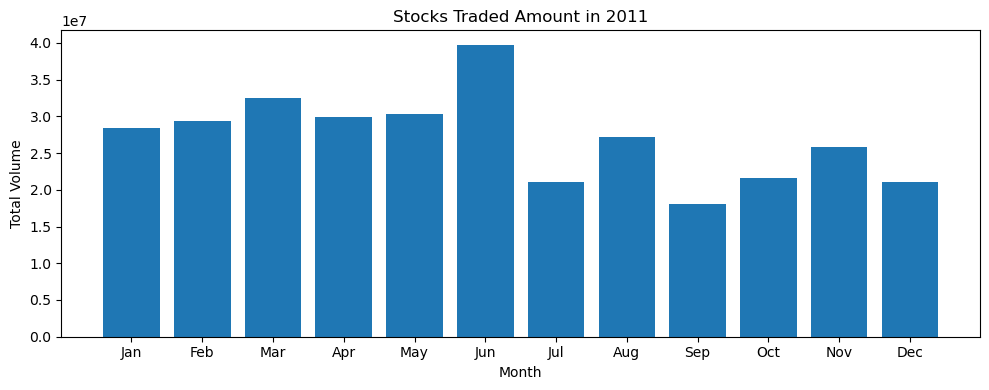

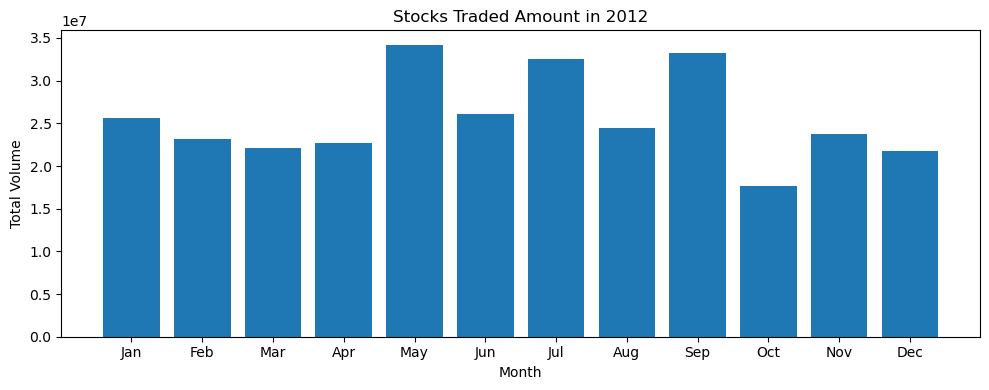

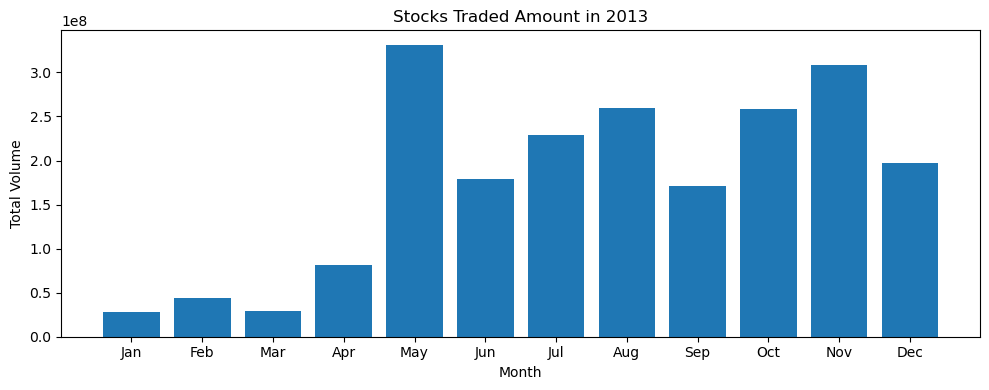

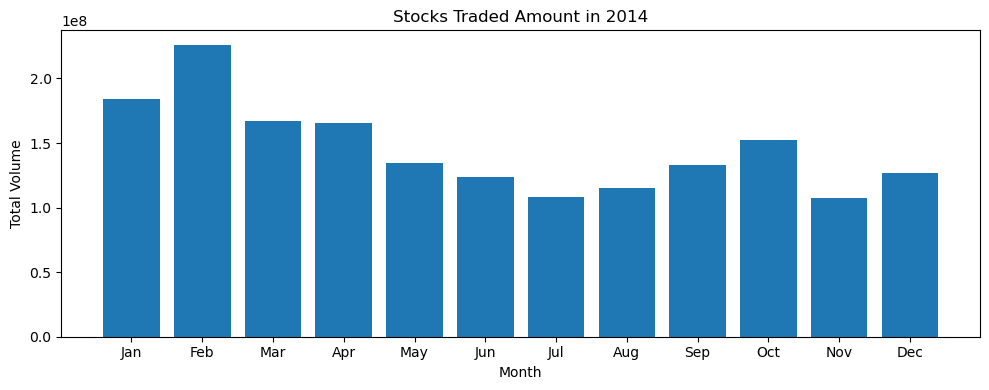

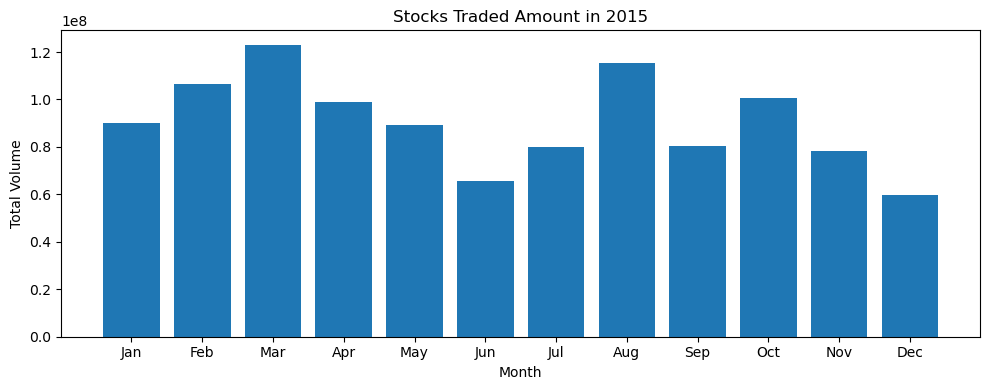

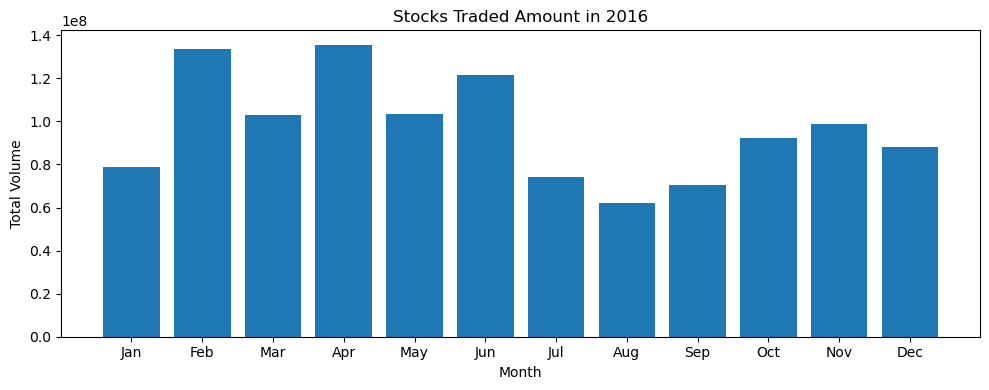

In [18]:
import calendar
# Loop through each year and create a bar graph for stocks traded amount per month
for year in range(2010, 2017):
    yearly_data = tesla_data.loc[str(year)]
    monthly_volume = yearly_data['Volume'].resample('M').sum()
    
    plt.figure(figsize=(10, 4))
    plt.bar(monthly_volume.index.month, monthly_volume)
    plt.title(f'Stocks Traded Amount in {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Volume')
    plt.xticks(range(1, 13), calendar.month_abbr[1:])  # Use calendar month abbreviations
    plt.tight_layout()
    plt.show()

# **Part 5**

Line Graph showing the trend of starting price.
o Pick one year and show how the starting price changes over each day in the whole
year.(No dynamic visualization)

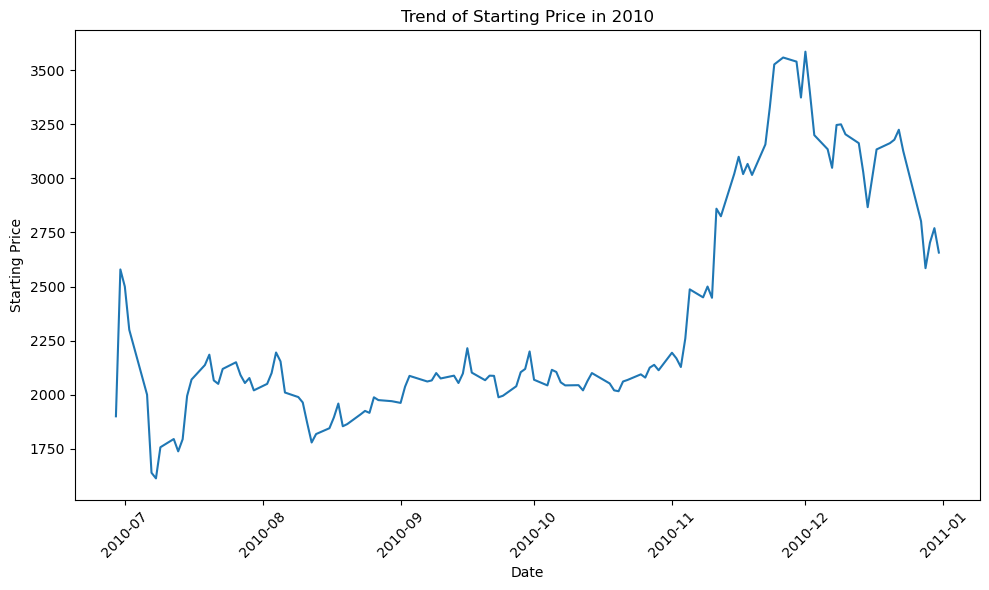

In [9]:
# Select a specific year
year_to_plot = 2010

# Filter the data for the selected year
selected_year_data = tesla_data.loc[str(year_to_plot)]

# Plot the trend of starting price over each day in the year
plt.figure(figsize=(10, 6))
plt.plot(selected_year_data.index, selected_year_data['Open'])
plt.title(f'Trend of Starting Price in {year_to_plot}')
plt.xlabel('Date')
plt.ylabel('Starting Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()